In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

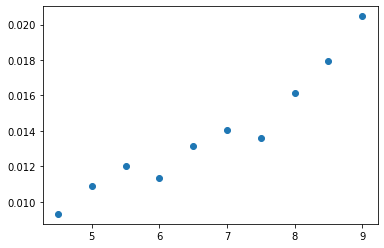

In [64]:
np.random.seed(25512)

R = 470
U = np.arange(4.5, 9.1, 0.5)

I_true = U / R 
I_measured = I_true + np.random.normal(0, 1e-3, size=U.size)

plt.scatter(U, I_measured)

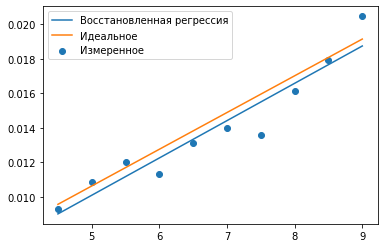

In [69]:
# Интерфейс для работы с моделями в sklearn

model = LinearRegression(fit_intercept=True)  # Создание/инициализация модели
# Обучение модели, fit(Признаки, Ответы) = fit(X, y).
# Признаки должны быть матрицей - где строка - объект, а столбец - измерение признака

X = U.reshape(-1, 1)
y = I_measured

model.fit(X, y)
yfit = model.predict(X)

plt.scatter(X, y, label='Измеренное')
plt.plot(X, yfit, label='Восстановленная регрессия');
plt.plot(X, I_true, label='Идеальное')

plt.legend()

In [70]:
theta1 = model.coef_[0]
R_estimate = 1 / theta1
R_estimate

462.56173403514276

In [73]:
df = pd.read_csv('blood_pressure.csv')
df.head()

,age,pressure
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


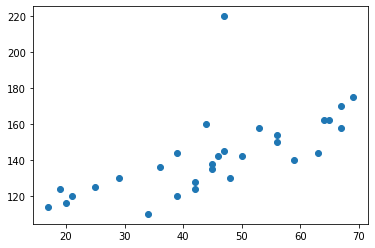

In [81]:
X = df.age.values.reshape(-1, 1)
y = df.pressure.values

plt.scatter(X, y)

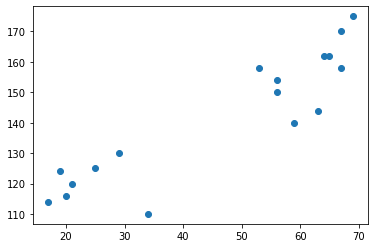

In [89]:
mask = (X < 35) | (X > 50)
X_prime = X[mask].reshape(-1, 1)
y_prime = y[mask.ravel()]

plt.scatter(X_prime, y_prime)

Text(0.5, 1.0, 'СД = 98.1 + 0.95 * год')

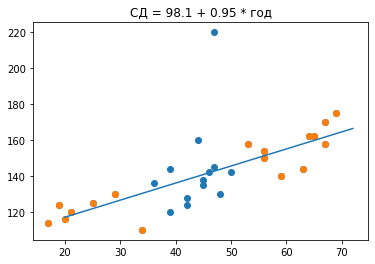

In [96]:
model = LinearRegression(fit_intercept=True)
model.fit(X_prime, y_prime)

X_fit = np.linspace(20, 72).reshape(-1, 1)
y_fit = model.predict(X_fit)

theta0 = model.intercept_
theta1 = model.coef_[0]
title = f'СД = {theta0:.1f} + {theta1:.2f} * год'

plt.scatter(X, y)
plt.scatter(X_prime, y_prime)
plt.plot(X_fit, y_fit)
plt.title(title)